# Creating dataset and plotting the data

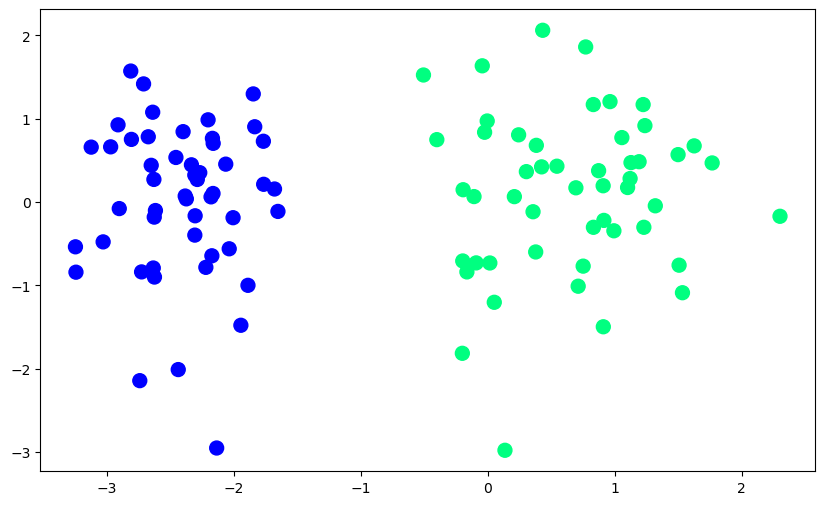

In [4]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
        n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [5]:
X[0]

array([ 0.35523945, -0.11697552])

In [6]:
y.shape

(100,)

# training dataset using LogisticRegression library

In [7]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [8]:
print(lor.coef_)
print(lor.intercept_)

[[7.03712123 0.38753222]]
[6.7741321]


In [9]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
print(f"{m1}   {b1}")

-18.158802907935552   [-17.48017773]


In [10]:

import random

# Writting our own function / algorithm for LogisticRegression

In [11]:
# previous step function
def step(y):
    return 1 if y > 0 else 0


# previous sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# LogisticRegression algo where step function is used

In [12]:
def gd(x_train,y_train):
    x_train=np.insert(x_train,0,1,axis=1)
    weight=np.ones(x_train.shape[1])
    lr=0.01
    for j in range(1000):
        idx=np.random.randint(0,100)
        
        y_hat=step(np.dot(x_train[idx],weight))
        weight=weight+lr*(y_train[idx]-y_hat)*x_train[idx]
    return weight

# LogisticRegression algo where sigmoid function is used

In [13]:
def logicreg(x_train,y_train):
    x_train=np.insert(x_train,0,1,axis=1)
    weight=np.ones(x_train.shape[1])
    lr=0.01
    for j in range(1000):
        idx=np.random.randint(0,100)
        
        y_hat=sigmoid(np.dot(x_train[idx],weight))
        weight=weight+lr*(y_train[idx]-y_hat)*x_train[idx]
    return weight

# Object declaration of step function

In [14]:
gdd=gd(X,y)
print(gdd)
print("coef_      intercept_")

[1.14       1.07966175 0.54212659]
coef_      intercept_


In [15]:
inter_1=gdd[0]
coef_1=gdd[1:]

In [18]:
m2 = -(coef_1[0]/coef_1[1])
b2 = -(inter_1/coef_1[1])

In [19]:
print(f"{m2}   {b2}")

-1.991530692554369   -2.102829888438715


# Object declaration of sigmoid function

In [20]:
log_reg=logicreg(X,y)
print(log_reg)
print("coef_      intercept_")

[1.32453112 2.04687971 0.39407841]
coef_      intercept_


In [21]:
inter_2=log_reg[0]
coef_2=log_reg[1:]

In [22]:
print(f"{inter_2}   {coef_2}")

1.3245311192322213   [2.04687971 0.39407841]


In [23]:
m3 = -(coef_2[0]/coef_2[1])
b3 = -(inter_2/coef_2[1])

In [24]:
print(f"{m3}   {b3}")

-5.194092437070324   -3.361085188052061


In [31]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1  #  logistic library line

y_input2 = m2*x_input1 + b2  #  logistic step function line

y_input3 = m3*x_input1 + b3  #  logistic sigmoid function line




(-3.0, 2.0)

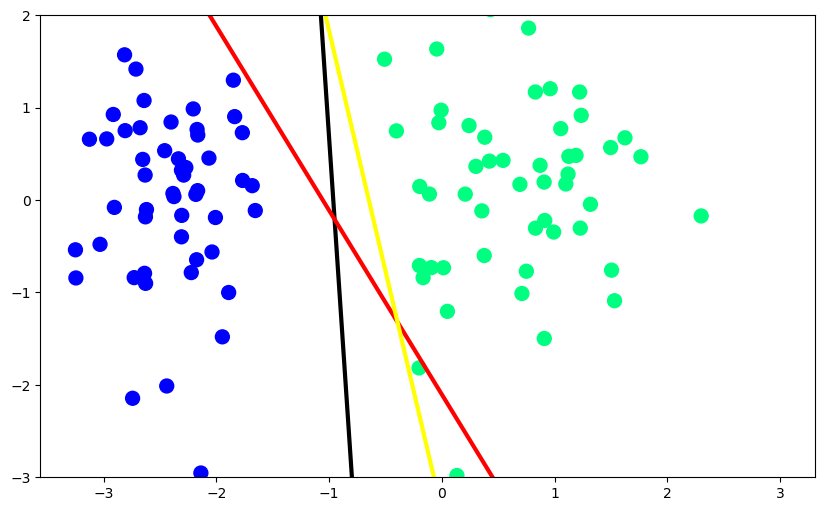

In [32]:
# using logistic library        (black)
# using logistic step function   (red)
# using logistic sigmoid function (yellow)

plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input1,y_input2,color='red',linewidth=3)
plt.plot(x_input1,y_input3,color='yellow',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

###### Sigmoid function performing better than step function

In [26]:
x_input1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18